# Chutes & ladders simualtion analysis

The code below will plot histograms of:
* 1 player
* 2 Players
* 4 Players
* 8 Players

Text(0, 0.5, 'Winning players')

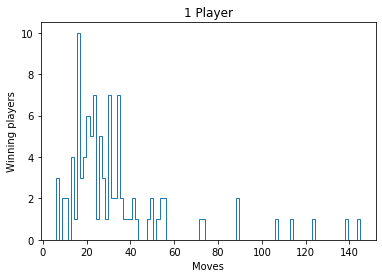

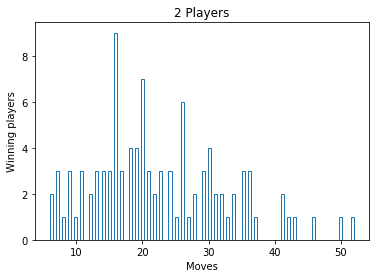

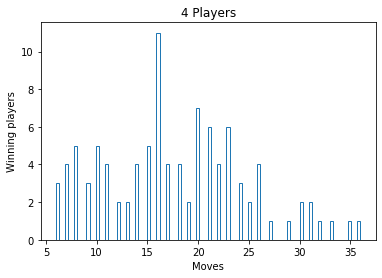

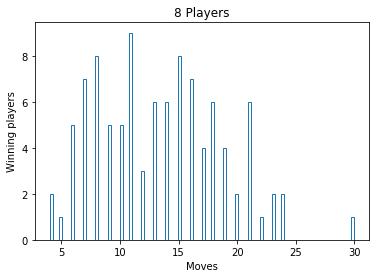

In [11]:
__author__ = 'Aleksander Eriksen', 'Eirik Høyheim'
__email__ = 'jaer@nmbu.no', 'eirihoyh@nmbu.no'


from snakes_and_ladders import multi_game_experiment

from matplotlib import pyplot as plt


games = 100 # Running 100 simulations
seed = 2842164 # given seed
plt.subplots()


one_player = multi_game_experiment(games, 1, seed)
plot_one = plt.hist(one_player, histtype = 'step', bins = games)
plt.title('1 Player')
plt.xlabel('Moves')
plt.ylabel('Winning players')

plt.figure()
two_player = multi_game_experiment(games, 2, seed)
plot_two = plt.hist(two_player, histtype = 'step', bins = games)
plt.title('2 Players')
plt.xlabel('Moves')
plt.ylabel('Winning players')


plt.figure()
four_player = multi_game_experiment(games, 4, seed)
plot_four = plt.hist(four_player, histtype = 'step', bins = games)
plt.title('4 Players')
plt.xlabel('Moves')
plt.ylabel('Winning players')


plt.figure()
eight_player = multi_game_experiment(games, 8, seed)
plot_eight = plt.hist(eight_player, histtype = 'step', bins = games)
plt.title('8 Players')
plt.xlabel('Moves')
plt.ylabel('Winning players')

